# Tarefa 1 - Prática - Bloco 1

Baseado no notebook em que se aplicou a implementação da RNA Perceptron para determinar a classe da flor iris, você deve ajustar o mesmo algoritmo, no Google Colab, para a execução do dataset Bancario (disponível aqui no Moodle). Fazer testes com valores diferentes das amostras treinadas. Entregar um PDF no Notebook gerado com os devidos processamentos.

Obs: A entrega até a data limite será atribuída a nota integral com os descontos dos erros. A partir desta data será descontado 10% da nota no dia seguinte somado a 1% por dia de atraso, podendo ser entregue até a data final da Segunda Chamada. Contudo, parte da resolução do exercício será disponibilizada no dia posterior à data limite sem desconto.

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('bancario.csv')
display(df)

,Conta,Renda,Dívida,Classe
0,101,2800,550,bom
1,102,1300,500,mau
2,103,1400,80,bom
3,104,500,200,mau
4,105,1100,270,mau
5,106,1800,450,bom
6,107,2400,650,bom
7,108,1950,600,bom
8,109,450,70,mau
9,110,2750,730,bom


In [3]:
X=df.iloc[:, [1,2]].values

scaler = preprocessing.MinMaxScaler()
X=scaler.fit_transform(X)

In [4]:
# bom = 1, mau = -1
y=df.iloc[:, 3].values
y=np.where(y == 'bom', 1, -1)
y

array([ 1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,
        1, -1,  1,  1])

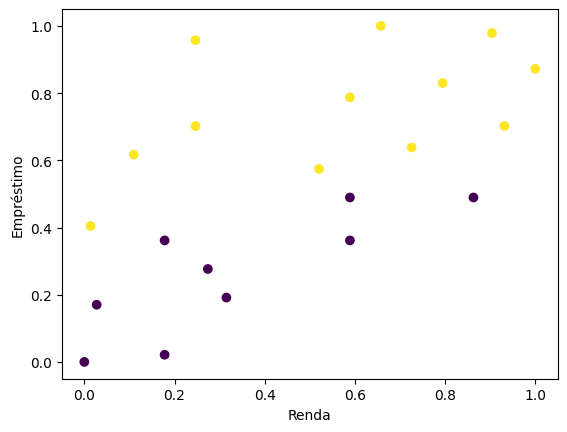

In [5]:
plt.scatter(X[:, 1], X[:, 0], c=y)
plt.xlabel('Renda')
plt.ylabel('Empréstimo')
plt.show()

Acurácia de treino:  1.0
Acurácia de teste:  0.8571428571428571
Total de iterações:  6
              precision    recall  f1-score   support

          -1       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



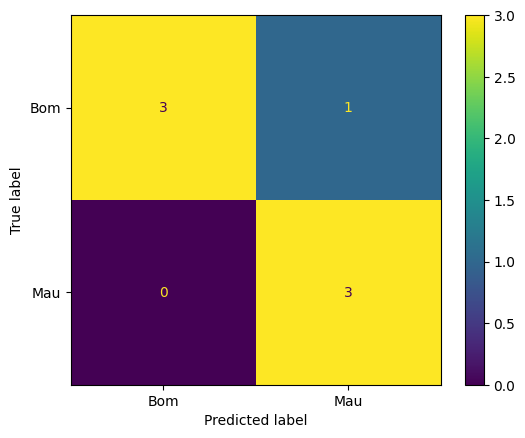

In [6]:
# Treinamento sem ajuste nos pesos:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

p = Perceptron(eta0=0.001, random_state=42, penalty='elasticnet', l1_ratio=1)
p.fit(X_train, y_train)

prediction_train = p.predict(X_train)
train_score = accuracy_score(prediction_train, y_train)
print("Acurácia de treino: ", train_score)

prediction_test = p.predict(X_test)
test_sore = accuracy_score(prediction_test, y_test)
print("Acurácia de teste: ", test_sore)

print("Total de iterações: ", p.n_iter_)

print(classification_report(y_test, prediction_test))

conf_matrix = confusion_matrix(y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Bom', 'Mau'])
cm_display.plot()

Acurácia de treino:  1.0
Acurácia de teste:  1.0
Total de iterações:  6
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



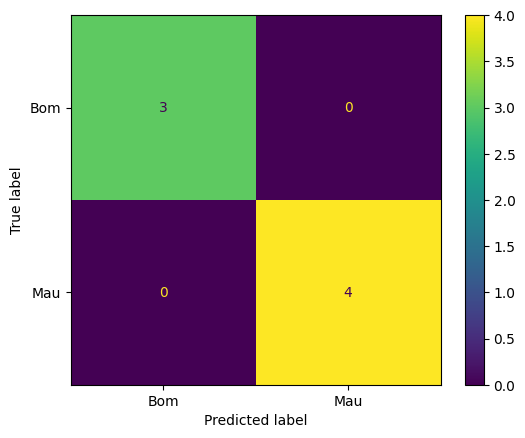

In [7]:
# Treinamento sem ajuste nos pesos + stratify:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

p = Perceptron(eta0=0.001, random_state=42, penalty='elasticnet', l1_ratio=1)
p.fit(X_train, y_train)

prediction_train = p.predict(X_train)
train_score = accuracy_score(prediction_train, y_train)
print("Acurácia de treino: ", train_score)

prediction_test = p.predict(X_test)
test_sore = accuracy_score(prediction_test, y_test)
print("Acurácia de teste: ", test_sore)

print("Total de iterações: ", p.n_iter_)

print(classification_report(y_test, prediction_test))

conf_matrix = confusion_matrix(y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Bom', 'Mau'])
cm_display.plot()

Acurácia de treino:  1.0
Acurácia de teste:  1.0
Total de iterações:  6
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



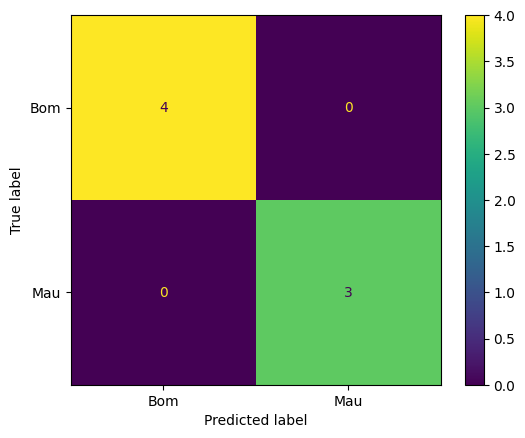

In [8]:
# Treinamento com ajuste nos pesos:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

p = Perceptron(eta0=0.001, random_state=42, class_weight={1: 0.55, -1: 0.5})
p.fit(X_train, y_train)

prediction_train = p.predict(X_train)
train_score = accuracy_score(prediction_train, y_train)
print("Acurácia de treino: ", train_score)

prediction_test = p.predict(X_test)
test_sore = accuracy_score(prediction_test, y_test)
print("Acurácia de teste: ", test_sore)

print("Total de iterações: ", p.n_iter_)

print(classification_report(y_test, prediction_test))

conf_matrix = confusion_matrix(y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Bom', 'Mau'])
cm_display.plot()